# Planar data classification with one hidden layer


<a name='1'></a>
# 1 - Packages



- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [1]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

<a name='2'></a>
# 2 - Load the Dataset 



In [2]:
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Our goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

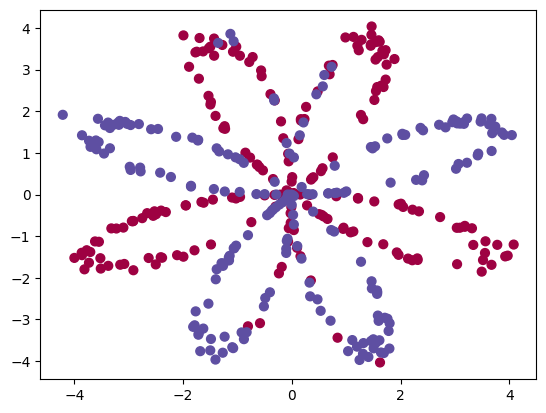

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

We have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

First, get a better sense of what your data is like. 

<a name='ex-1'></a>


In [4]:

shape_X = np.shape(X)
shape_Y = np.shape(Y)
m = np.shape(X)[1]


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Expected Output**:
       
<table style="width:20%">
  <tr>
    <td> shape of X </td>
    <td> (2, 400) </td> 
  </tr>
  <tr>
    <td>shape of Y</td>
    <td>(1, 400) </td> 
    </tr>
    <tr>
    <td>m</td>
    <td> 400 </td> 
  </tr>
</table>

<a name='3'></a>
## 3 - Simple Logistic Regression

Before building a full neural network, let's check how logistic regression performs on this problem. We'll use sklearn's built-in functions for this. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


plotting the decision boundary of these models! Run the code below.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


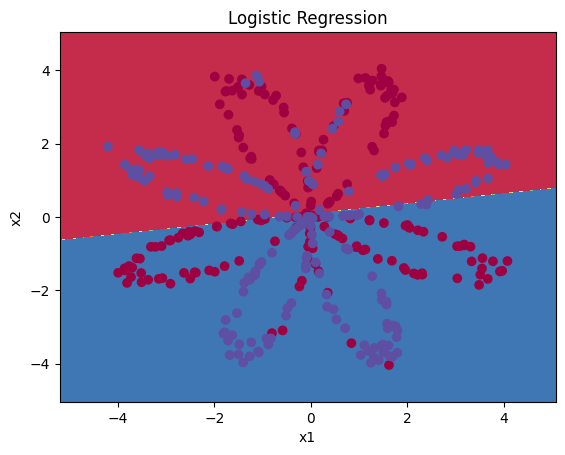

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>Accuracy</td>
    <td> 47% </td> 
  </tr>
  
</table>


**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

<a name='4'></a>
## 4 - Neural Network model

Logistic regression didn't work well on the flower dataset. Next, we're going to train a Neural Network with a single hidden layer and see how that handles the same problem.

**The model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{\text{prediction}} = \begin{cases} 1 & \text{if } a^{[2](i)} > 0.5 \\ 0 & \text{otherwise.} \end{cases} \tag{5}$$

Given the predictions on all the examples, we can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In practice, you'll often build helper functions to compute steps 1-3, then merge them into one function called `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.

<a name='4-1'></a>
### 4.1 - Defining the neural network structure ####


Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (**set this to 4, only for this Exercise 2**) 
    - n_y: the size of the output layer

Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [7]:


def layer_sizes(X, Y):
    
    n_h = 4
    n_x = np.shape(X)[0]
    n_y = np.shape(Y)[0]
    
    return (n_x, n_h, n_y)

In [11]:
n_x,n_h,n_y = layer_sizes(X,Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))



The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


<a name='4-2'></a>
### 4.2 - Initializing the model's parameters ####



Implement the function `initialize_parameters()`.



In [12]:

def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    
   

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
np.random.seed(2)
n_x, n_h, n_y =  layer_sizes(X,Y)
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


<a name='4-3'></a>
### 4.3 - The Loop 


Implement `forward_propagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$




In [15]:


def forward_propagation(X, parameters):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
   
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [22]:
def forward_propagation_test():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4,1)
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters
t_X, parameters = forward_propagation_test()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = " + str(A2))


A2 = [[0.21292656 0.21274673 0.21295976]]


<a name='4-4'></a>
### 4.4 - Compute the Cost

Now that we've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$



Implement `compute_cost()` to compute the value of the cost $J$.




- Use that to build the whole expression of the cost function.


In [23]:


def compute_cost(A2, Y):
   
    
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y) 
    cost = -np.sum(logprobs)/m
    
   
    
    cost = float(np.squeeze(cost))  
    
    return cost

In [24]:
np.random.seed(1)
t_Y = (np.random.randn(1, 3) > 0)
A2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

cost = 0.6930587610394646


<a name='4-5'></a>
### 4.5 - Implementing Backpropagation

Using the cache computed during forward propagation, you can now implement backward propagation.



Implement the function `backward_propagation()`.



<img src="images/grad_summary.png" style="width:600px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Backpropagation. Use the six equations on the right.</font></center></caption>

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [27]:


def backward_propagation(parameters, cache, X, Y):
   
    m = X.shape[1]
   
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
   
    dZ2 = A2-Y
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-A1**2)
    dW1 = 1/m*(np.dot(dZ1,X.T))
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
     
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [31]:
X_assess = np.random.randn(2, 3)
Y_assess = (np.random.randn(1, 3) > 0)

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))


dW1 = [[ 0.00056608 -0.00042163]
 [ 0.00248072 -0.00184048]
 [-0.00231516  0.00173061]
 [-0.01008314  0.00746594]]
db1 = [[ 0.00014478]
 [ 0.00073129]
 [-0.00060021]
 [-0.00252302]]
dW2 = [[-0.11340677  0.06982892 -0.03751437  0.03602786]]
db2 = [[-0.12045565]]


<a name='4-6'></a>
### 4.6 - Updating Parameters 



Implement the update rule. Use gradient descent. We are going to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">
<caption><center><font color='purple'><b>Figure 2</b>: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.</font></center></caption>



Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. It avoids input parameters being modified within the function. In some scenarios, this could be inefficient, but it is required for grading purposes.


In [32]:


def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [34]:

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



W1 = [[-0.00552617  0.00044923]
 [-0.02731569  0.02081987]
 [-0.01237797 -0.01257093]
 [ 0.02922834 -0.03037113]]
b1 = [[ 1.74446428]
 [-0.76296199]
 [ 0.3204796 ]
 [-0.24331513]]
W2 = [[ 0.26159674 -0.1766795   0.09554902 -0.06354478]]
b2 = [[-1.01090644]]


<a name='4-7'></a>
### 4.7 - Integration

Integrate the functions in `nn_model()` 


Build the neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [35]:


def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [37]:
def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess
def nn_model_test(target):
    np.random.seed(1)
    X = np.random.randn(2, 3)
    Y = (np.random.randn(1, 3) > 0)
    n_h = 4
    
    t_X, t_Y = nn_model_test_case()
    parameters = target(t_X, t_Y, n_h, num_iterations=10000, print_cost=True)

    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    
    expected_output = {'W1': np.array([[ 0.56305445, -1.03925886],
                                   [ 0.7345426 , -1.36286875],
                                   [-0.72533346,  1.33753027],
                                   [ 0.74757629, -1.38274074]]), 
                       'b1': np.array([[-0.22240654],
                                   [-0.34662093],
                                   [ 0.33663708],
                                   [-0.35296113]]), 
                       'W2': np.array([[ 1.82196893,  3.09657075, -2.98193564,  3.19946508]]), 
                       'b2': np.array([[0.21344644]])}
    
    np.random.seed(3)
    output = target(X, Y, n_h, print_cost=False)
    
nn_model_test(nn_model)

Cost after iteration 0: 0.693198
Cost after iteration 1000: 0.000219
Cost after iteration 2000: 0.000108
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024
W1 = [[ 0.56305445 -1.03925886]
 [ 0.7345426  -1.36286875]
 [-0.72533346  1.33753027]
 [ 0.74757629 -1.38274074]]
b1 = [[-0.22240654]
 [-0.34662093]
 [ 0.33663708]
 [-0.35296113]]
W2 = [[ 1.82196893  3.09657075 -2.98193564  3.19946508]]
b2 = [[0.21344644]]


<a name='5'></a>
## 5 - Testing the Model

<a name='5-1'></a>
### 5.1 - Predicting


Predict with the model by building `predict()`.
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    


In [38]:


def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = A2>0.5
    return predictions

In [39]:
np.random.seed(1)
t_X = np.random.randn(2, 3)

predictions = predict(parameters, t_X)
print("Predictions: " + str(predictions))


Predictions: [[False False False]]


<a name='5-2'></a>
### 5.2 - Testing the Model on the Planar Dataset

It's time to run the model and see how it performs on a planar dataset.!

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220710
Cost after iteration 8000: 0.219421
Cost after iteration 9000: 0.218489


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

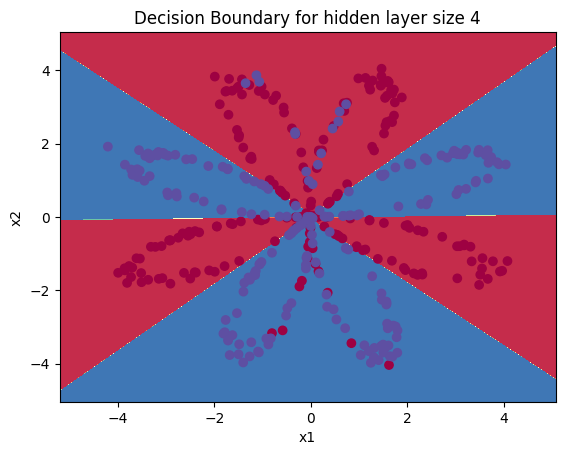

In [40]:

parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)


plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [41]:
# Printing the accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression. The model has learned the patterns of the flower's petals! Unlike logistic regression, neural networks are able to learn even highly non-linear decision boundaries. 

<a name='6'></a>
## 6 - Tuning hidden layer size 


In [ ]:


plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.75 %


**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.


<a name='7'></a>
## 7- Performance on other datasets

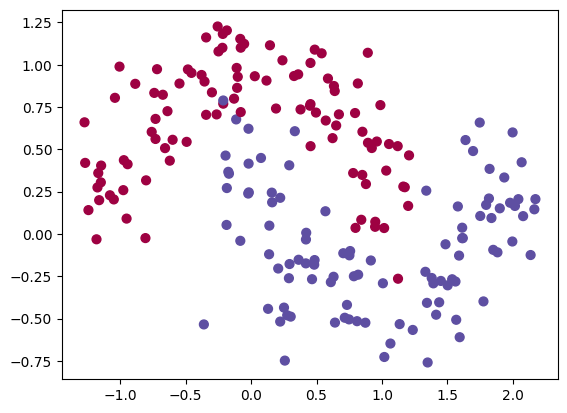

In [42]:

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}


dataset = "noisy_moons"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])


if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);